In [3]:
# Importaciones de las librerias necesarias
#%pip install xlrd
#%pip install pandas
#%pip install openpyxl

import pandas as pd

file_path_Datos = r'raw_data\Perfil_EmpresasImpo_2022_WEB.xlsx'

file_path = r'raw_data'

columnas_a_leer = ['Cod_Provincia', 'Provincia_Ubicacion', 'Valor_FOB_USD', 'Valor_CIF_USD', 'Capitulo_desc_SA']

#Creación del dataframe con todos los datos

df = pd.read_excel(file_path_Datos, usecols=columnas_a_leer)

#Creación de dataframe sumando todos los costos de importación por provincia 
df_grouped = df.groupby('Provincia_Ubicacion')['Valor_CIF_USD'].sum().reset_index()

# Ahora 'Valor_CIF_USD' es una columna en 'df_grouped' y podemos aplicar el formato
df_grouped['Valor_CIF_USD'] = df_grouped['Valor_CIF_USD'].apply(lambda x: '{:.2f}'.format(x))

print(df_grouped)




       Provincia_Ubicacion  Valor_CIF_USD
0                     Azua    23372836.40
1                  Baoruco       66582.70
2                 Barahona    31394659.78
3                  Dajabón     5591093.13
4        Distrito Nacional  7644229241.84
5                   Duarte    43291909.24
6                 El Seibo      517791.43
7               Elías Piña     3200481.30
8                Espaillat   299238329.25
9               Hato Mayor     2424846.03
10        Hermanas Mirabal    22518311.31
11           Independencia     6053746.75
12           La Altagracia   139137773.38
13               La Romana   430844468.24
14                 La Vega   240022682.64
15  María Trinidad Sánchez     8656212.58
16          Monseñor Nouel   209255885.43
17            Monte Cristi    51835440.65
18             Monte Plata     5702540.71
19              Pedernales    10790190.50
20                 Peravia    34871460.95
21            Puerto Plata    54202331.35
22                  Samaná     564

In [4]:

# Conviersión del 'Valor_CIF_USD' a tipo numérico, ignorando errores
df_grouped['Valor_CIF_USD'] = pd.to_numeric(df_grouped['Valor_CIF_USD'], errors='coerce')

# Calculo del costo total de las importaciones
total_costo_importaciones = df_grouped['Valor_CIF_USD'].sum()

# Impresión del costo total de las importaciones en notación normal
print(f"Total Costo Importaciones: {total_costo_importaciones:.2f}")

# Calculo del porcentaje del costo de importación por provincia
df_grouped['Porcentaje'] = (df_grouped['Valor_CIF_USD'] / total_costo_importaciones) * 100

# Ordenamiento del DataFrame por 'Valor_CIF_USD' en orden ascendente
df_grouped_sorted = df_grouped.sort_values('Valor_CIF_USD', ascending=False).reset_index()

# Configuración de la opción de visualización para mostrar el formato float en lugar de notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Impresión del DataFrame para verificar los resultados
print(df_grouped_sorted[['Provincia_Ubicacion', 'Valor_CIF_USD', 'Porcentaje']])


Total Costo Importaciones: 18542073677.85
       Provincia_Ubicacion  Valor_CIF_USD  Porcentaje
0        Distrito Nacional  7644229241.84       41.23
1            Santo Domingo  4206379358.41       22.69
2            San Cristóbal  2233699515.71       12.05
3                 Santiago  1929012557.09       10.40
4                La Romana   430844468.24        2.32
5                Espaillat   299238329.25        1.61
6     San Pedro de Macorís   290249046.37        1.57
7          Sánchez Ramírez   274652288.41        1.48
8          Sin información   262509107.19        1.42
9                  La Vega   240022682.64        1.29
10          Monseñor Nouel   209255885.43        1.13
11           La Altagracia   139137773.38        0.75
12                Valverde    57885736.72        0.31
13            Puerto Plata    54202331.35        0.29
14            Monte Cristi    51835440.65        0.28
15                  Duarte    43291909.24        0.23
16                 Peravia    34871460.9

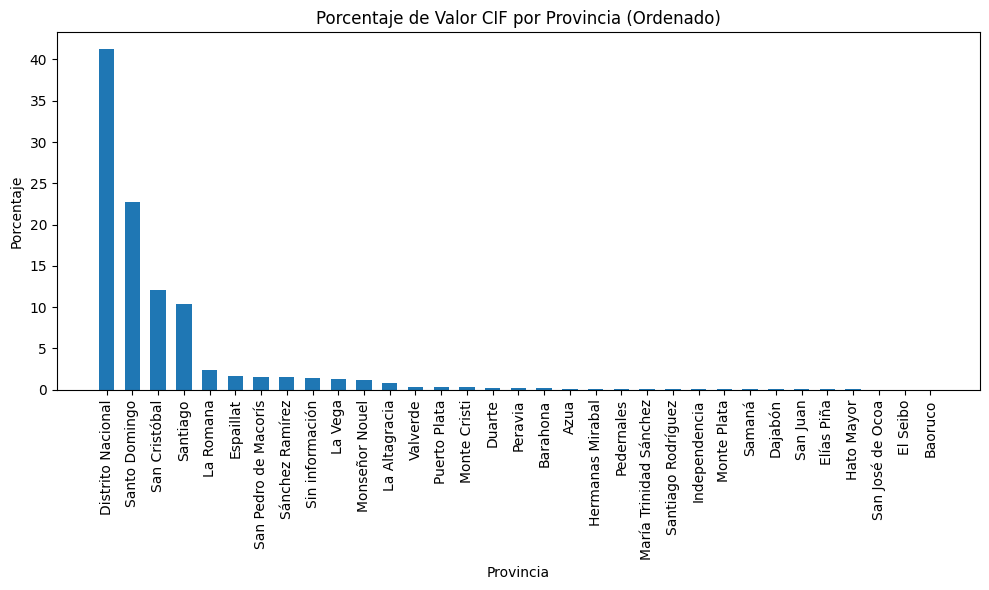

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)

# Creación del gráfico de barras con los datos ordenados
plt.bar(df_grouped_sorted['Provincia_Ubicacion'], df_grouped_sorted['Porcentaje'], width=0.6)

# Rotación de los nombres de las etiquetas del eje X a vertical
plt.xticks(rotation=90)

# Personalización del gráfico (opcional)
plt.ylabel('Porcentaje')
plt.xlabel('Provincia')
plt.title('Porcentaje de Valor CIF por Provincia (Ordenado)')

# for index, row in df_grouped_sorted.iterrows():
#      plt.text(index, row['Porcentaje'], f"{row['Porcentaje']:.2f}%", ha='center', va='bottom')

# creación del gráfico
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para que el gráfico se ajuste al área de dibujo
plt.show()